In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [2]:
def despine(ax=None, top=False, bottom=True, left=True, right=False):
    if ax is None:
        ax = plt.gca()
    for what, state in (['top', top], ['bottom', bottom], ['left', left], ['right', right]):
        ax.spines[what].set_visible(state)
    return ax

In [3]:
df_metrics = pd.read_csv(
    '../../data/country_metrics_multiyear.csv'
).dropna()
df_longevity = df_metrics.loc[
    df_metrics.SeriesName == 'Life expectancy at birth, total (years)'
][
    ['CountryCode', 'Year', 'value']
].rename(columns={
    'value': 'life_expectancy'
}).sort_values(
    ['CountryCode', 'Year']
).set_index('CountryCode', drop=True)

In [4]:
df_longevity.loc['FRA'].head()

Year  life_expectancy
CountryCode                       
FRA          1992        77.100000
FRA          1993        77.300000
FRA          1994        77.648780
FRA          1995        77.751220
FRA          1996        77.953659

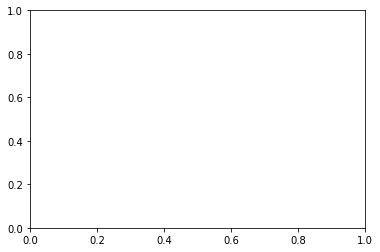

In [5]:
# Challenge 1. Plot life expectancy in France over the time
fig, ax = plt.subplots()
# ...

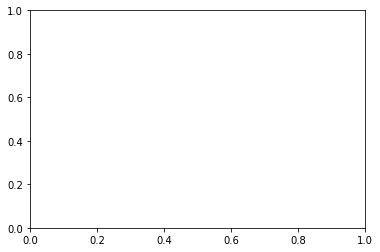

In [6]:
# Challenge 2. Plot life expectancy in France (FRA), Great Britain (GBR), Italy (ITA), and Germany (GER) over the time
fig, ax = plt.subplots()
for country_code in ['FRA', 'GBR', 'ITA', 'GER']:
    pass
# ...

In [7]:
df_regions = pd.read_csv(
    '../../data/geo_regions.csv'
).set_index('CountryCode')
df_regions.head()

region
CountryCode                           
ABW          Latin America & Caribbean
AND              Europe & Central Asia
AFG                         South Asia
AGO                 Sub-Saharan Africa
ALB              Europe & Central Asia

In [8]:
country_names = pd.read_csv(
    '../../data/country_names.csv'
).set_index(
    'CountryCode', drop=True
).CountryName
country_names.loc['FRA']

'France'

In [9]:
df_europe_central_asia = df_longevity.join(
    df_regions.loc[df_regions.region == 'Europe & Central Asia']
).dropna(
).drop(
    'region', axis=1
).drop(
    ['SRB'], axis=0
    # Remove Serbia due to too few data
)

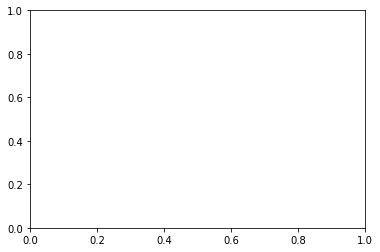

In [10]:
# Challenge 3: plot life expectancy all all the countries in Europe & Central Asia
fig, ax = plt.subplots()
groupped = df_europe_central_asia.groupby(
    df_europe_central_asia.index
)
for country_code, country_data in groupped:
    country_name = country_names.loc[country_code]
# ...

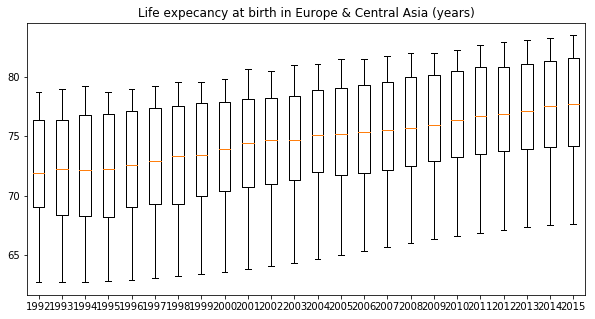

In [11]:
groupped = df_europe_central_asia.groupby('Year')
fig, ax = plt.subplots(figsize=(10, 5))
life_expectancy_values = [v for year, v in groupped.life_expectancy]
years = [year for year, v in groupped.life_expectancy]
ax.boxplot(life_expectancy_values)
ax.set_xticklabels(years) # note that the labels overlap!
ax.set_title('Life expecancy at birth in Europe & Central Asia (years)')
None

In [12]:
df_metrics.SeriesName.unique()

array(['Population, total', 'Surface area (sq. km)',
       'Life expectancy at birth, total (years)',
       'Fertility rate, total (births per woman)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'GDP per capita (current US$)'], dtype=object)

In [13]:
df_gdp = df_metrics.loc[
    df_metrics.SeriesName == 'GDP per capita (current US$)'
].dropna(
).drop(
    'SeriesName', axis=1
)


In [14]:
import seaborn as sns

In [15]:
df_2015_tmp = df_metrics.loc[
    df_metrics.Year == 2015
].drop(
    'Year', axis=1
)
df_2015_tmp.head(3)

CountryCode         SeriesName       value
32110         AFG  Population, total  33736494.0
32111         ALB  Population, total   2880703.0
32112         DZA  Population, total  39871528.0

In [16]:
series_to_take = [
    'Life expectancy at birth, total (years)',
    'Fertility rate, total (births per woman)',
    'GDP per capita (current US$)'
]
df_2015_tmp = df_metrics.loc[
    (df_metrics.Year == 2015) &
    (df_metrics.SeriesName.isin(series_to_take))
].drop(
    'Year', axis=1
)
df_2015_tmp.head(3)

CountryCode                               SeriesName      value
32543         AFG  Life expectancy at birth, total (years)  63.298195
32544         ALB  Life expectancy at birth, total (years)  78.203146
32545         DZA  Life expectancy at birth, total (years)  75.855293